<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/Complementaria/ADG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

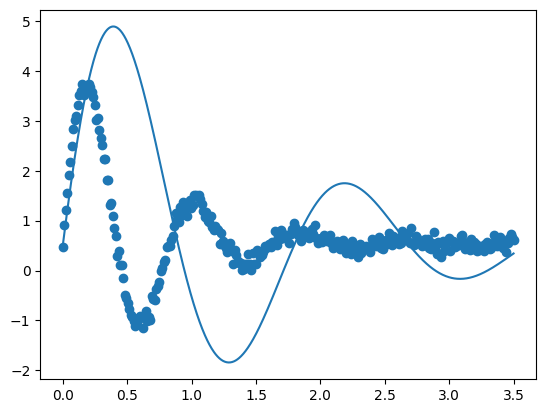

In [82]:
from os import read
import numpy as np
import matplotlib.pyplot as plt
read=np.loadtxt('ajuste.dat')
x1=np.array(read[:,0])
y1=np.array(read[:,1])
def funcion(a,b,c,d,x):
    return a*np.sin(b*x)*np.exp(-x*c)+d



x=np.linspace(0,3.5,1000)
y=5.9*np.sin(3.5*x)*np.exp(-x*0.7)+0.5
plt.plot(x,y)
plt.scatter(x1,y1)
plt.show()

a óptimo: 5.90504805624132
b óptimo: 3.5225022951980454
c óptimo: -0.7325255982843313
d óptimo: 0.4995936699624622


ValueError: x and y must have same first dimension, but have shapes (300,) and (1000,)

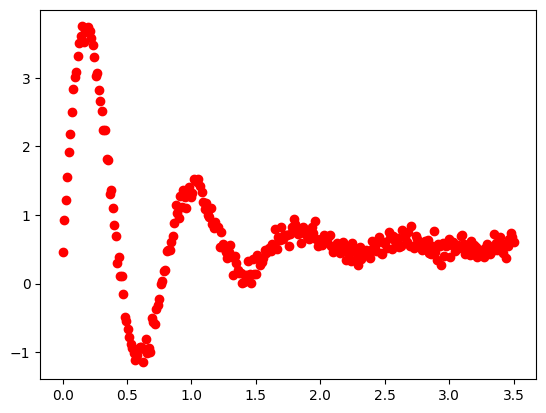

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


read=np.loadtxt('ajuste.dat')
x1=np.array(read[:,0])
y1=np.array(read[:,1])

def prediccion(a, b, c, d, x):
    return a * np.sin(b * x) * np.exp(c * x) + d


def gradientes(a, b, c, d, x, y):
    m = len(y)
    y_pred = prediccion(a, b, c, d, x)

    grad_a = (1 / m) * np.sum((y_pred - y) * np.sin(b * x) * np.exp(c * x))
    grad_b = (1 / m) * np.sum((y_pred - y) * a * np.cos(b * x) * x * np.exp(c * x))
    grad_c = (1 / m) * np.sum((y_pred - y) * a * np.sin(b * x) * x * np.exp(c * x))
    grad_d = (1 / m) * np.sum(y_pred - y)

    return grad_a, grad_b, grad_c, grad_d


def descenso_gradiente(x, y, learning_rate, n_iteraciones):

    a = 6
    b = 4
    c = 1
    d = 0.5

    for i in range(n_iteraciones):

        grad_a, grad_b, grad_c, grad_d = gradientes(a, b, c, d, x, y)


        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c
        d -= learning_rate * grad_d
        return a, b, c, d


learning_rate = 0.000199
n_iteraciones = 1000


a_opt, b_opt, c_opt, d_opt= descenso_gradiente(x1, y1, learning_rate, n_iteraciones)


print(f"a óptimo: {a_opt}")
print(f"b óptimo: {b_opt}")
print(f"c óptimo: {c_opt}")
print(f"d óptimo: {d_opt}")


plt.scatter(x1, y1, label='Datos', color='red')
plt.plot(x1, prediccion(a_opt, b_opt, c_opt, d_opt, x), label='Ajuste', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste con Descenso de Gradiente')
plt.legend()
plt.show()


